In [39]:
import pandas as pd, numpy as np
import glob
import os
import csv
# 一次性merge多个pct_chg
from functools import reduce
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [40]:
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go

#setting offilne
plotly.offline.init_notebook_mode(connected=True)

https://www.joinquant.com/view/community/detail/32c1dfe4e9d62b6a59934f59a6d18c82

In [41]:
def select_df_from_db_by_tickers(path, ticker_list):
    # e.g. ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
    csv_path = path+"*.csv"
    files = glob.glob(csv_path)
    
    tickers_data = []
    if len(ticker_list)!=1:
        for ticker in ticker_list:
            print("Reading: ", ticker)
            df = pd.read_csv(path+ticker+".csv")
            tickers_data.append(df)
        tickers_data_concated = pd.concat(tickers_data)
        tickers_data_concated.reset_index(inplace=True)
        del tickers_data_concated['index']
    else:
        df = pd.read_csv(path+ticker_list[0]+".csv")
        tickers_data_concated = df
    return tickers_data_concated


def get_df_date_price_code(path, ticker_list, date_col, price_col, code_col):
    # for etf data cols are 'date', 'close', 'code'
    ticker_df_list = []
    for ticker in ticker_list:
        print("Reading Assets: ", ticker)
        try:
            ticker_df = pd.read_csv(path+ticker+".csv")
            ticker_df = ticker_df.sort_values(date_col)
            ticker_df = ticker_df[[date_col, price_col, code_col]]
            ticker_df['pct_chg'] = ticker_df[price_col].pct_change()
            ticker_df = ticker_df[[date_col, 'pct_chg']].dropna()
            ticker_df.columns = [date_col,ticker]
            ticker_df[date_col] = pd.to_datetime(ticker_df[date_col])
            ticker_df_list.append(ticker_df)
        except:
            pass
    return ticker_df_list


def get_df_date_price_code_returns(path, ticker_list, date_col, price_col, code_col):
    # for etf data cols are 'date', 'close', 'code'
    ticker_df_list = []
    for ticker in ticker_list:
        print("Reading Assets: ", ticker)
        try:
            ticker_df = pd.read_csv(path+ticker+".csv")
            ticker_df = ticker_df.sort_values(date_col)
            ticker_df = ticker_df[[date_col, price_col, code_col]]
            ticker_df['pct_chg'] = ticker_df[price_col].pct_change()
            ticker_df['cum_returns'] = ticker_df['pct_chg'].cumsum()
            ticker_df = ticker_df[[date_col, 'cum_returns']].dropna()
            ticker_df.columns = [date_col,ticker]
            ticker_df[date_col] = pd.to_datetime(ticker_df[date_col])
            ticker_df_list.append(ticker_df)
        except:
            pass
    return ticker_df_list


# 先为之后使用reduce铺路：创造一个merge的函数，这里的目的是为了将多资产数据基于date_col进行merge：
def merge_df(df1, df2, date_col="date"):
    # By default the etf's date_col goes by 'date'
    merged = df1.merge(df2, on = date_col, how = 'outer')
    merged.sort_values(date_col, inplace = True)
    return merged

def merge_df_for_corr(ticker_df_list, date_col):
    # Here below merge_df is a function instead of a variable
    
    merged_all = reduce(merge_df, ticker_df_list)
    # For etf data the date col is 'date'
    merged_all.set_index(date_col, inplace=True)
    merged_all.dropna(how="all", axis = 1, inplace = True)
    return merged_all

In [42]:
selected_ETF_pool = pd.read_csv("selected_ETF_pool.csv")

In [43]:
selected_ETF_pool_list = list(selected_ETF_pool['code'].astype(str))
selected_ETF_pool_list

['511220',
 '511030',
 '511010',
 '513500',
 '513100',
 '513680',
 '510680',
 '159941',
 '511270',
 '510430',
 '513900',
 '510090',
 '513030',
 '510020',
 '511020',
 '510110',
 '510580',
 '159935',
 '510380',
 '159908',
 '512560',
 '159933',
 '159953',
 '510170',
 '513600',
 '159913',
 '159932',
 '159918',
 '512600',
 '513050',
 '159920',
 '159951',
 '159960',
 '510500',
 '159944',
 '159916',
 '513660',
 '510560',
 '510270',
 '159901']

In [44]:
ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"
# ticker_list = ['511220',
#  '159926',
#  '511030',
#  '511280',
#  '511290',
#  '518880',
#  '511010',
#  '511310',
#  '511270',
#  '511020',
#  '513680',
#  '513500',
#  '513100',
#  '510120',
#  '513900',
#  '159941',
#  '510430',
#  '513030',
#  '510680',
#  '510090']
ticker_list = selected_ETF_pool_list
ticker_df_list = get_df_date_price_code(ch_db_path, ticker_list, "date", "close", "code")
merged_df = merge_df_for_corr(ticker_df_list, "date")

Reading Assets:  511220
Reading Assets:  511030
Reading Assets:  511010
Reading Assets:  513500
Reading Assets:  513100
Reading Assets:  513680
Reading Assets:  510680
Reading Assets:  159941
Reading Assets:  511270
Reading Assets:  510430
Reading Assets:  513900
Reading Assets:  510090
Reading Assets:  513030
Reading Assets:  510020
Reading Assets:  511020
Reading Assets:  510110
Reading Assets:  510580
Reading Assets:  159935
Reading Assets:  510380
Reading Assets:  159908
Reading Assets:  512560
Reading Assets:  159933
Reading Assets:  159953
Reading Assets:  510170
Reading Assets:  513600
Reading Assets:  159913
Reading Assets:  159932
Reading Assets:  159918
Reading Assets:  512600
Reading Assets:  513050
Reading Assets:  159920
Reading Assets:  159951
Reading Assets:  159960
Reading Assets:  510500
Reading Assets:  159944
Reading Assets:  159916
Reading Assets:  513660
Reading Assets:  510560
Reading Assets:  510270
Reading Assets:  159901


In [45]:
ticker_df_returns_list = get_df_date_price_code_returns(ch_db_path, ticker_list, "date", "close", "code")
merged_df_returns = merge_df_for_corr(ticker_df_returns_list, "date")

Reading Assets:  511220
Reading Assets:  511030
Reading Assets:  511010
Reading Assets:  513500
Reading Assets:  513100
Reading Assets:  513680
Reading Assets:  510680
Reading Assets:  159941
Reading Assets:  511270
Reading Assets:  510430
Reading Assets:  513900
Reading Assets:  510090
Reading Assets:  513030
Reading Assets:  510020
Reading Assets:  511020
Reading Assets:  510110
Reading Assets:  510580
Reading Assets:  159935
Reading Assets:  510380
Reading Assets:  159908
Reading Assets:  512560
Reading Assets:  159933
Reading Assets:  159953
Reading Assets:  510170
Reading Assets:  513600
Reading Assets:  159913
Reading Assets:  159932
Reading Assets:  159918
Reading Assets:  512600
Reading Assets:  513050
Reading Assets:  159920
Reading Assets:  159951
Reading Assets:  159960
Reading Assets:  510500
Reading Assets:  159944
Reading Assets:  159916
Reading Assets:  513660
Reading Assets:  510560
Reading Assets:  510270
Reading Assets:  159901


Text(0.5, 1.0, 'Cumulative Returns on 40 ETFs')

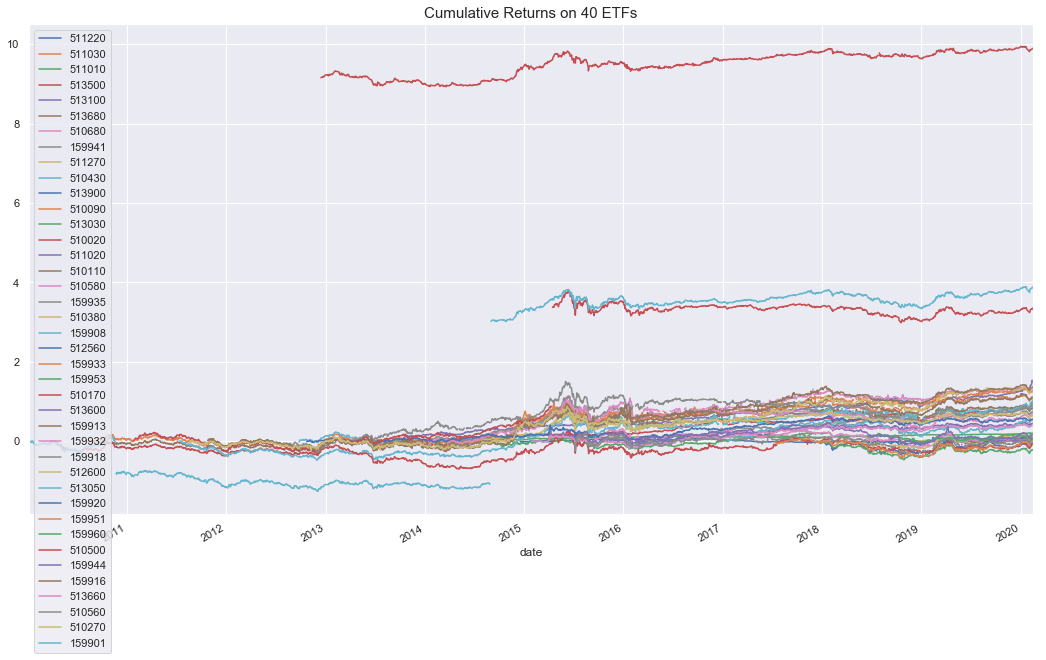

In [46]:
merged_df_returns.plot(figsize = (18, 10))
plt.title("Cumulative Returns on 40 ETFs", fontsize = 15)

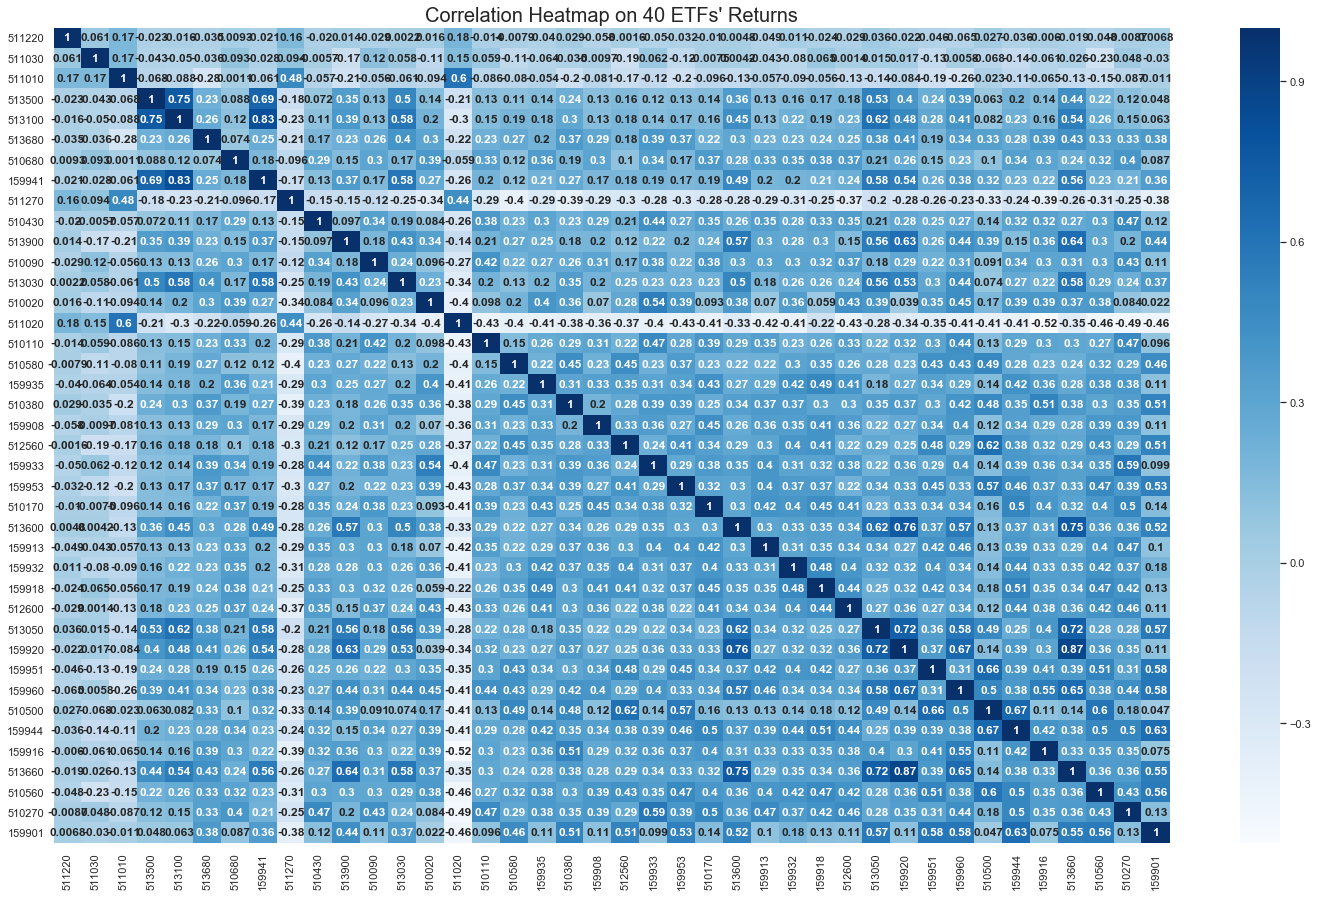

In [47]:
fig = plt.figure(figsize = (25, 15))
ax = fig.add_subplot(111)
ax = sns.heatmap(merged_df.corr(),\
                annot=True, annot_kws={'size':12, 'weight': 'bold'}, cmap = 'Blues')
plt.title("Correlation Heatmap on 40 ETFs' Returns", fontsize = 20);

In [48]:
from scipy.optimize import minimize

def get_smart_weight(pct, method='risk parity', cov_adjusted=False, wts_adjusted=False):
    if cov_adjusted == False:
        #协方差矩阵
        cov_mat = pct.cov()
    else:
        #调整后的半衰协方差矩阵
        cov_mat = pct.iloc[:len(pct)/4].cov()*(1/10.) + pct.iloc[len(pct)/4+1:len(pct)/2].cov()*(2/10.) +\
            pct.iloc[len(pct)/2+1:len(pct)/4*3].cov()*(3/10.) + pct.iloc[len(pct)/4*3+1:].cov()*(4/10.)
    if not isinstance(cov_mat, pd.DataFrame):
        raise ValueError('cov_mat should be pandas DataFrame！')
        
    omega = np.matrix(cov_mat.values)  # 协方差矩阵

    a, b = np.linalg.eig(np.array(cov_mat)) #a为特征值,b为特征向量
    a = np.matrix(a)
    b = np.matrix(b)
    # 定义目标函数
    
    def fun1(x):
        tmp = (omega * np.matrix(x).T).A1
        risk = x * tmp/ np.sqrt(np.matrix(x) * omega * np.matrix(x).T).A1[0]
        delta_risk = [sum((i - risk)**2) for i in risk]
        return sum(delta_risk)
    
    def fun2(x):
        tmp = (b**(-1) * omega * np.matrix(x).T).A1
        risk = (b**(-1)*np.matrix(x).T).A1 * tmp/ np.sqrt(np.matrix(x) * omega * np.matrix(x).T).A1[0]
        delta_risk = [sum((i - risk)**2) for i in risk]
        return sum(delta_risk)
    
    # 初始值 + 约束条件 
    x0 = np.ones(omega.shape[0]) / omega.shape[0]  
    bnds = tuple((0,None) for x in x0)
    cons = ({'type':'eq', 'fun': lambda x: sum(x) - 1})
    options={'disp':False, 'maxiter':1000, 'ftol':1e-20}
        
    if method == 'risk parity':
        res = minimize(fun1, x0, bounds=bnds, constraints=cons, method='SLSQP', options=options)
    elif method == 'pc risk parity':
        res = minimize(fun2, x0, bounds=bnds, constraints=cons, method='SLSQP', options=options)
    else:
        raise ValueError('method error！！！')
        
    # 权重调整
    if res['success'] == False:
        # print res['message']
        pass
    wts = pd.Series(index=cov_mat.index, data=res['x'])
    
    if wts_adjusted == True:
        wts[wts < 0.0001]=0.0
        wts = wts / wts.sum()
    elif wts_adjusted == False:
        wts = wts / wts.sum()
    else:
        raise ValueError('wts_adjusted should be True/False！')
        
    risk = pd.Series(wts * (omega * np.matrix(wts).T).A1 / np.sqrt(np.matrix(wts) * omega * np.matrix(wts).T).A1[0],index = cov_mat.index)
    risk[risk<0.0] = 0.0
    return wts,risk

In [11]:
wts, risk = get_smart_weight(merged_df, method='risk parity', cov_adjusted=False, wts_adjusted=False)

In [12]:
df_wts = pd.DataFrame(wts)
df_wts.reset_index(inplace = True)
df_wts.columns = ['ETF', 'Portfolio_Weight']

In [13]:
df_wts

,ETF,Portfolio_Weight
0,511220,1.012311e-01
1,511030,1.694780e-01
2,511010,1.625708e-01
3,513500,1.255175e-02
4,513100,9.837409e-03
5,513680,9.485954e-03
6,510680,4.512914e-03
7,159941,8.655195e-03
8,511270,3.550700e-01
9,510430,4.596165e-03


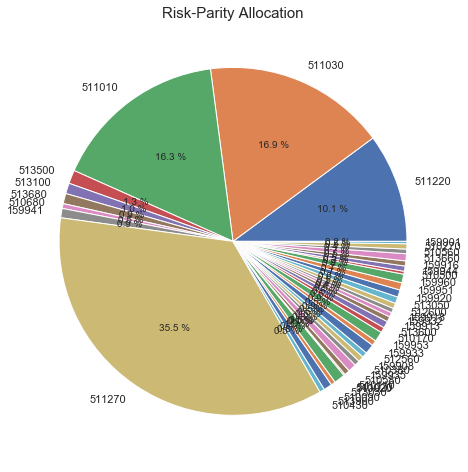

In [14]:
etfs = list(df_wts['ETF'])
weights = list(df_wts['Portfolio_Weight'])
# 保证圆形
plt.figure(1, figsize = (8, 8))
plt.axes(aspect=1)
plt.pie(x=weights, labels=etfs, autopct='%3.1f %%')
plt.title("Risk-Parity Allocation", fontsize = 15)
plt.show()

In [125]:
# int(200000*0.14/101.837)*2 #511030 - 20200108
# int(200000*0.012/1.04)*2 #513900 - 20200110
# int(200000*0.015/2.02)*2 #159942 - 20200110
# int(200000*0.141/119.7)*2 #511010 - 20200113进仓

# int(200000*0.141/119.7)*2 #511290 - 20200115进仓 - 万家50，弃，波动性太大
# 159926 国债ETF：弃，原因：日波动太大
# 510120 非洲short弃，原因：日波动太大

int(200000*0.149/105.370)*2 #511270 #进：十年地债,太高，观望
# 159941 纳指：close the position: 20200203
# 518880: 黄金ETF本应该进，但是弃，原因：gap太频繁，日波动太大
# 159941 纳指：20200205多信号，但太高，观察
# 513100 纳指：20200205多信号，但太高，观察，问题：两者选其一应该选哪个？
# 513500：标普500，20200206多信号，但太高，观察
# 513030: 德国30:多信号，金仓：流动性有待观察，已进仓 
# int(200000*0.017/1.108)*2

# # 159951中关村A 20200212 多信号：仓位自行决定，5%
# print('数量',int(200000*0.05/0.908), '代码：159951','是否执行：已进多仓，流动性偏低，收盘前补齐了剩下3800股','执行日期：20200213')
# # 159932 500深ETF 20200212 多信号：仓位自行决定，5%
# print('数量',int(200000*0.05/1.58), '代码：159932','是否执行：已进多仓，流动性偏低','执行日期：20200213')

# print('数量',int(200000*0.008972*2/0.846), '代码：512560 中证军工','是否执行：waiting','执行日期：20200214')
# print('数量',int(200000*0.004953*2/1.75), '代码：510170 商品ETF','是否执行：waiting','执行日期：20200214')
# print('数量',int(200000*0.004182*2/1.637), '代码：159918 中创400','是否执行：waiting','执行日期：20200214')

# 20200217中午记录（起晚了，闹铃定错，11:30才起）: 周末重新调整ETF的池子，发现很多新加入的ETF在周四晚就有开仓信号，因此今天不进去
print("=============日期：20200217早记录：=============")
print('数量',int(200000*0.018972/0.999), '代码：513680 建信H股','执行：不进，弃','信号日期：20200213晚','执行日期：20200217')
print('数量',int(200000*0.015383/5.695), '代码：510580 ZZ500ETF','执行：错过，午盘开盘进','信号日期：20200213晚','执行日期：20200217')
print('数量',int(200000*0.012822/2.711), '代码：513600 恒指ETF','执行：错过，午盘开盘进','信号日期：20200213晚','执行日期：20200217')
print('数量',int(200000*0.010118/2.918), '代码：512600 主要消费','执行：错过，本次不进','信号日期：20200213晚','执行日期：20200217')
print('数量',int(200000*0.013423/1.543), '代码：159920 恒生ETF','执行：错过，午盘开盘进','信号日期：20200213晚','执行日期：20200217')
print('数量',int(200000*0.005427/5.999), '代码：510500 500ETF','执行：错过，本次不进','信号日期：20200213晚','执行日期：20200217')
print('数量',int(200000*0.009685/0.768), '代码：159944 全指材料','执行：午盘开盘进，流动性差，收盘前未进仓，成交量太低，弃','信号日期：20200213晚','执行日期：20200217')
print('数量',int(200000*0.013206/2.691), '代码：513660 恒生通','执行：错过，午盘开盘进','信号日期：20200213晚','执行日期：20200217')
print('数量',int(200000*0.004374/5.405), '代码：159901 深100ETF','执行：错过，本次不进','信号日期：20200213晚','执行日期：20200217')

print("=============日期：20200218早记录：=============")
print('**清仓**', '代码：511010 国债ETF','执行：  ','信号日期：20200217晚','执行日期：20200218')
print('数量',int(200000*0.01/2.006), '代码：159913 深价值','执行：忘记进仓，愚蠢错误！','信号日期：20200217晚','执行日期：20200218')
print('数量',int(200000*0.0161/1.053), '代码：159960 恒生国企','执行：已进仓','信号日期：20200217晚','执行日期：20200218')
print('数量',int(200000*0.00263/2.987), '代码：510020 超大ETF','执行：日high low差太高，弃','信号日期：20200217晚','执行日期：20200218')

print("=============日期：20200219早记录：=============")
print('数量',int(200000*0.008313/1.868), '代码：510090')
print('数量',int(200000*0.010042/3.757), '代码：510110')
print('数量',int(200000*0.009798/2.16), '代码：159933')
print('数量',int(200000*0.009494/4.441), '代码：159916')
print('数量',int(200000*0.009788/1.097), '代码：510270')

=============日期：20200217早记录：=============
数量 3798 代码：513680 建信H股 执行：不进，弃 信号日期：20200213晚 执行日期：20200217
数量 540 代码：510580 ZZ500ETF 执行：错过，午盘开盘进 信号日期：20200213晚 执行日期：20200217
数量 945 代码：513600 恒指ETF 执行：错过，午盘开盘进 信号日期：20200213晚 执行日期：20200217
数量 693 代码：512600 主要消费 执行：错过，本次不进 信号日期：20200213晚 执行日期：20200217
数量 1739 代码：159920 恒生ETF 执行：错过，午盘开盘进 信号日期：20200213晚 执行日期：20200217
数量 180 代码：510500 500ETF 执行：错过，本次不进 信号日期：20200213晚 执行日期：20200217
数量 2522 代码：159944 全指材料 执行：午盘开盘进，流动性差，收盘前未进仓，成交量太低，弃 信号日期：20200213晚 执行日期：20200217
数量 981 代码：513660 恒生通 执行：错过，午盘开盘进 信号日期：20200213晚 执行日期：20200217
数量 161 代码：159901 深100ETF 执行：错过，本次不进 信号日期：20200213晚 执行日期：20200217
=============日期：20200218早记录：=============
**清仓** 代码：511010 国债ETF 执行：   信号日期：20200217晚 执行日期：20200218
数量 997 代码：159913 深价值 执行：忘记进仓，愚蠢错误！ 信号日期：20200217晚 执行日期：20200218
数量 3057 代码：159960 恒生国企 执行：已进仓 信号日期：20200217晚 执行日期：20200218
数量 176 代码：510020 超大ETF 执行：日high low差太高，弃 信号日期：20200217晚 执行日期：20200218
=============日期：20200219早记录：=============
数量 890 代码：510090
数量 534 代码：510110

In [116]:
df_wts[df_wts['ETF']=='510090']['Portfolio_Weight']*2

11    0.008313
Name: Portfolio_Weight, dtype: float64

In [117]:
df_wts[df_wts['ETF']=='510110']['Portfolio_Weight']*2

15    0.010042
Name: Portfolio_Weight, dtype: float64

In [118]:
df_wts[df_wts['ETF']=='159933']['Portfolio_Weight']*2

21    0.009798
Name: Portfolio_Weight, dtype: float64

In [119]:
df_wts[df_wts['ETF']=='159916']['Portfolio_Weight']*2

35    0.009494
Name: Portfolio_Weight, dtype: float64

In [120]:
df_wts[df_wts['ETF']=='510270']['Portfolio_Weight']*2

38    0.009788
Name: Portfolio_Weight, dtype: float64

In [121]:
df_wts[df_wts['ETF']=='159945']['Portfolio_Weight']*2

Series([], Name: Portfolio_Weight, dtype: float64)

In [126]:
date = [
    "2020-01-02",
    "2020-01-03",
    "2020-01-06",
    "2020-01-07",
    "2020-01-08",
    "2020-01-09",
    "2020-01-10",
    "2020-01-13",
    "2020-01-14",
    "2020-01-15",
    "2020-01-16",
    "2020-01-17",
    "2020-01-20",
    "2020-01-21",
    "2020-01-22",
    "2020-01-23",
    "2020-02-03",
    "2020-02-04",
    "2020-02-05",
    "2020-02-06",
    "2020-02-07",
    "2020-02-10",
    "2020-02-11",
    "2020-02-12",
    "2020-02-13",
    "2020-02-14",
    "2020-02-17",
    "2020-02-18",
    "2020-02-19",
    "2020-02-20",
    "2020-02-21"
]

In [127]:
sbtv1 = [0+1,#1/2
        0+1,
        0+1,
        0+1,
        -0.005/100+1,
        -0.001/100+1,
        0.01/100+1,
        0.01/100+1,
        0.03/100+1,
        0.02/100+1,
        -0.03/100+1,
        0.06/100+1,
        0.07/100+1,
        0.13/100+1,
        0.0795/100+1,
        0.2/100+1,
        0.68136/100+1,
         710/200000+1,#2/4
         824.42/200000+1,#2/5
         654.42/200000+1,#2/6
         745.42/200000+1,#2/7
         833/200000+1,#2/8
         933/200000+1,#2/11
         911/200000+1,
         676.53/200000+1,
         882.52/200000+1,
         1813.76/200000+1,
         2210.96/200000+1,
         1947.66/200000+1,
         2553.70/200000+1,
         2881.31/200000+1
        ]

In [128]:
sh_index = pd.read_csv(ch_db_path+"sh000001.csv")

In [129]:
sh_index

,trade_date,open,high,low,close,volume,ts_code
0,1990-12-20,104.3000,104.3900,99.9800,104.3900,197.0,sh000001
1,1990-12-21,109.0700,109.1300,103.7300,109.1300,28.0,sh000001
2,1990-12-24,113.5700,114.5500,109.1300,114.5500,32.0,sh000001
3,1990-12-25,120.0900,120.2500,114.5500,120.2500,15.0,sh000001
4,1990-12-26,125.2700,125.2700,120.2500,125.2700,100.0,sh000001
...,...,...,...,...,...,...,...
7125,2020-02-17,2924.9913,2983.6371,2924.9913,2983.6224,313198007.0,sh000001
7126,2020-02-18,2981.4097,2990.6003,2960.7751,2984.9716,311665913.0,sh000001
7127,2020-02-19,2979.5223,2998.2718,2971.8219,2975.4019,315141151.0,sh000001
7128,2020-02-20,2981.8802,3031.3706,2968.4451,3030.1542,345732881.0,sh000001


In [130]:
sh_index['pct_chg'] = sh_index['close'].pct_change()
sh_index_2020 = sh_index[sh_index['trade_date']>='2020-01-02']
sh_index_2020['adjusted_pct_chg'] = sh_index_2020['pct_chg']
sh_index_2020['adjusted_pct_chg'].values[0] = 0
sh_index_2020['cum_sum_pct_chg'] = sh_index_2020['adjusted_pct_chg'].cumsum()+1

/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
track_record = pd.DataFrame()
track_record['date'] = date
track_record['sbtv1'] = sbtv1
track_record['sh_mkt'] = sh_index_2020['cum_sum_pct_chg'].values
track_record.index = pd.to_datetime(track_record['date'])
del track_record['date']

track_record['returns0'] = track_record['sbtv1'].diff()
track_record['returns0'].values[0] = 0
track_record['returns1'] = track_record['sh_mkt'].diff()
track_record['returns1'].values[0] = 0

In [132]:
# track_record.to_csv("20200102_SBTV1_performance.csv")

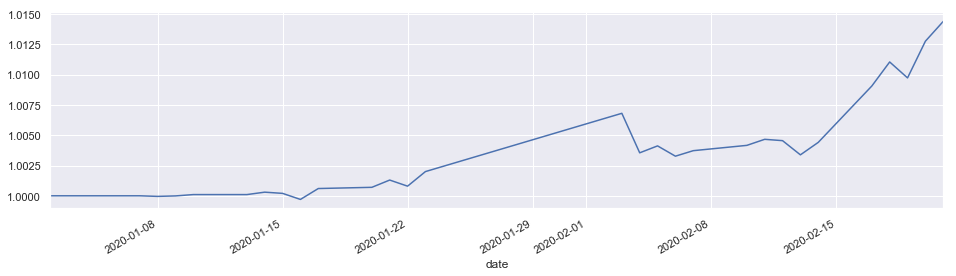

In [133]:
track_record['sbtv1'].plot(figsize = [16,4])

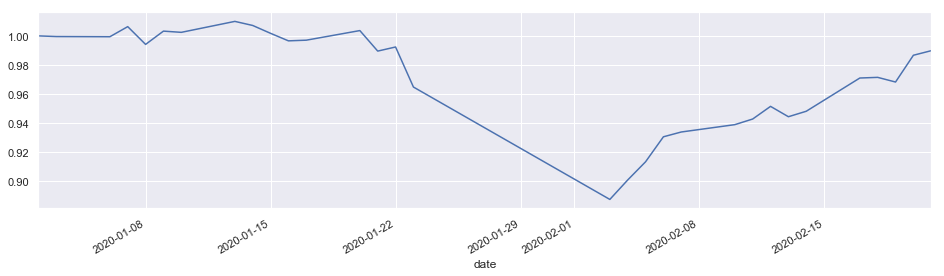

In [134]:
track_record['sh_mkt'].plot(figsize = [16,4])

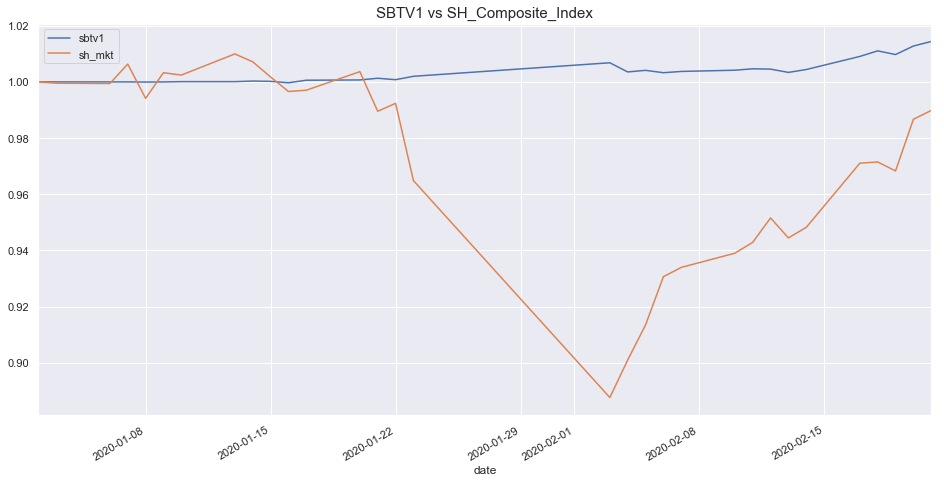

In [135]:
track_record[['sbtv1','sh_mkt']].plot(figsize = [16,8])
plt.title("SBTV1 vs SH_Composite_Index", fontsize = 15);

In [136]:
def create_sharpe_ratio(returns, periods=252):
    print("*****performance.py: 1. create_sharpe_ratio*****")
    """
    Create the Sharpe ratio for the strategy, based on a 
    benchmark of zero (i.e. no risk-free rate information).
    Parameters:
    returns - A pandas Series representing period percentage returns.
    periods - Daily (252), Hourly (252*6.5), Minutely(252*6.5*60) etc.
    """
    return np.sqrt(periods) * (np.mean(returns)) / np.std(returns)

def create_drawdowns(pnl):
    print("*****performance.py: 2. create_drawdowns*****")
    """
    Calculate the largest peak-to-trough drawdown of the PnL curve
    as well as the duration of the drawdown. Requires that the 
    pnl_returns is a pandas Series.
    Parameters:
    pnl - A pandas Series representing period percentage returns.
    Returns:
    drawdown, duration - Highest peak-to-trough drawdown and duration.
    """

    # Calculate the cumulative returns curve 
    # and set up the High Water Mark
    hwm = [0]

    # Create the drawdown and duration series
    idx = pnl.index
    drawdown = pd.Series(index = idx)
    duration = pd.Series(index = idx)

    # Loop over the index range
    for t in range(1, len(idx)):
        hwm.append(max(hwm[t-1], pnl[t]))
        drawdown[t]= (hwm[t]-pnl[t])
        duration[t]= (0 if drawdown[t] == 0 else duration[t-1]+1)
    return drawdown, drawdown.max(), duration.max()

def create_expected_annual_returns(pnl, periods=252):
    traded_days = len(pnl)
    last_pnl = pnl.values[-1]
    annual_returns = (1+last_pnl)**(periods/traded_days)-1
    return annual_returns

def create_total_returns(pnl):
    return pnl.values[-1]

In [137]:
# Calculate Alpha and Beta:

import statsmodels.api as sm
from statsmodels import regression

X = track_record['returns1'].values
Y = track_record['returns0'].values

def linreg(x, y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()
    
    x = x[:,1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print("alpha: ", str(alpha))
print("beta: ", str(beta))

alpha:  0.00045506488364418005
beta:  -0.029465530906756788


- 计算alpha，beta

https://blog.csdn.net/CoderPai/article/details/82868280 

In [138]:
sharpe_ratio0 = create_sharpe_ratio(track_record['returns0'], periods=252)
sharpe_ratio1 = create_sharpe_ratio(track_record['returns1'], periods=252)
drawdown0, max_drawdown0, max_dd_duration0 = create_drawdowns(track_record['sbtv1'])
drawdown1, max_drawdown1, max_dd_duration1 = create_drawdowns(track_record['sh_mkt'])
annual_returns0 = create_expected_annual_returns(track_record['sbtv1']-1)
annual_returns1 = create_expected_annual_returns(track_record['sh_mkt']-1)
total_returns0 = create_total_returns(track_record['sbtv1']-1)
total_returns1 = create_total_returns(track_record['sh_mkt']-1)
corr_returns0_1 = track_record['returns0'].corr(track_record['returns1'])
# jensen_alpha = total_returns0 - corr_returns0_1*total_returns1

*****performance.py: 1. create_sharpe_ratio*****
*****performance.py: 1. create_sharpe_ratio*****
*****performance.py: 2. create_drawdowns*****
*****performance.py: 2. create_drawdowns*****


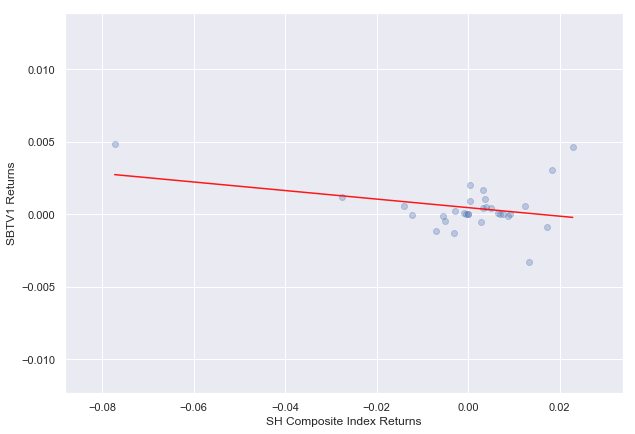

In [139]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2*beta+alpha

plt.figure(figsize=(10,7))
plt.scatter(X ,Y, alpha=0.3)
plt.xlabel("SH Composite Index Returns")
plt.ylabel("SBTV1 Returns")

plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()

In [140]:

print("=========================SBTV1策略=======================")
print("\n")
print("SBTV1策略 - 开始时间：2020-01-02")
print("SBTV1策略 - 当前时间：2020-02-18")
print("SBTV1策略 - 实时 绝对收益：", round(total_returns0*100, 2), "%")
print("SBTV1策略 - 实时 夏普比率：", round(sharpe_ratio0, 2))
print("SBTV1策略 - 实时 期望年化收益率：", round(annual_returns0*100, 2),"%")
print("SBTV1策略 - 实时 最大回撤比率：", round(max_drawdown0*100,2), "%")
print("SBTV1策略 - 实时 最大回撤持续时间：", int(max_dd_duration0), "天")
print("SBTV1策略 - 实时 Beta：", round(beta, 4))
print("SBTV1策略 - 实时 超额收益Alpha：", round(total_returns0-total_returns1, 4))
print("SBTV1策略 - 实时 风险调整Alpha：", round(alpha, 6))
print("\n")
print("=========================上证指数=======================")
print("\n")
print("上证指数 - 开始时间：2020-01-02")
print("上证指数 - 当前时间：2020-02-18")
print("上证指数 - 实时 绝对收益：", round(total_returns1*100,2), "%")
print("上证指数 - 实时 夏普比率：", round(sharpe_ratio1, 2))
print("上证指数 - 实时 最大回撤比率：", round(max_drawdown1*100,2), "%")
print("上证指数 - 实时 最大回撤持续时间：", int(max_dd_duration1), "天")

=========================SBTV1策略=======================


SBTV1策略 - 开始时间：2020-01-02
SBTV1策略 - 当前时间：2020-02-18
SBTV1策略 - 实时 绝对收益： 1.44 %
SBTV1策略 - 实时 夏普比率： 4.78
SBTV1策略 - 实时 期望年化收益率： 12.33 %
SBTV1策略 - 实时 最大回撤比率： 0.35 %
SBTV1策略 - 实时 最大回撤持续时间： 9 天
SBTV1策略 - 实时 Beta： -0.0295
SBTV1策略 - 实时 超额收益Alpha： 0.0246
SBTV1策略 - 实时 风险调整Alpha： 0.000455


=========================上证指数=======================


上证指数 - 开始时间：2020-01-02
上证指数 - 当前时间：2020-02-18
上证指数 - 实时 绝对收益： -1.02 %
上证指数 - 实时 夏普比率： -0.3
上证指数 - 实时 最大回撤比率： 12.24 %
上证指数 - 实时 最大回撤持续时间： 23 天


In [141]:
my_strat_plot = go.Scatter(
    x = track_record.index,
    y = track_record['sbtv1'],
    name = 'SBTV1策略累计收益率'
)
 
    
mkt_plot = go.Scatter(
    x = track_record.index,
    y = track_record['sh_mkt'],
    name = '上证指数累积收益率'
)
    
layout = dict(title = 'SBTV1策略累计收益率',
              xaxis = dict(title = '时间'), # 横轴坐标
              yaxis = dict(title = '收益率'), # 总轴坐标
              legend=dict(x=1.1,y=1) # 图例位置 
              )

data = [my_strat_plot, mkt_plot]

fig = dict(data=data, layout=layout)

py.iplot(fig)

In [136]:
drawdown0

date
2020-01-02         NaN
2020-01-03    0.000000
2020-01-06    0.000000
2020-01-07    0.000000
2020-01-08    0.000050
2020-01-09    0.000010
2020-01-10    0.000000
2020-01-13    0.000000
2020-01-14    0.000000
2020-01-15    0.000100
2020-01-16    0.000600
2020-01-17    0.000000
2020-01-20    0.000000
2020-01-21    0.000000
2020-01-22    0.000505
2020-01-23    0.000000
2020-02-03    0.000000
2020-02-04    0.003264
2020-02-05    0.002692
2020-02-06    0.003542
2020-02-07    0.003086
2020-02-10    0.002649
2020-02-11    0.002149
2020-02-12    0.002259
2020-02-13    0.003431
2020-02-14    0.002401
dtype: float64

In [170]:
dd_plot = go.Scatter(
    x = track_record.index,
    y = drawdown0,
    name = 'SBTV1 Drawdown'
)
    
layout_dd = dict(title = 'SBTV1 Drawdown',
              xaxis = dict(title = '时间'), # 横轴坐标
              yaxis = dict(title = '回撤比率'), # 总轴坐标
              legend=dict(x=1.1,y=1) # 图例位置 
              )

data_dd = [dd_plot]

fig_dd = dict(data=data_dd, layout=layout_dd)

py.iplot(fig_dd)